# Climate Change - Surface temperature

## Libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Functions

### Importing data

In [161]:
def importingdata(data_path):
     return pd.read_csv(data_path)

### Cleaning data


In [162]:
def dropcols(data,cols):
    data.drop(columns=cols,inplace=True)
    data.dropna(inplace=True)
    return data

#### Surface Temperature

In [163]:
surface_temperature_change_annual = importingdata('data/Annual_Surface_Temperature_Change.csv')

###### First, we'll look at the surface temperature annual change and select only non NaN values and the "Country" called **World**.

In [164]:
surface_temperature_change_annual.query('Country == "World"', inplace=True)

###### I'll drop the columns 'ISO2', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor' and 'Country'. Also, columns with NaN values will be dropped and others. I'll transpose the resulting DataFrame and rename the columns name of it.

In [165]:
surface_temperature_change_annual = dropcols(surface_temperature_change_annual,['ObjectId','ISO2','CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor','Country'])
surface_temperature_change_annual

,ISO3,Indicator,Unit,Source,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
221,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.211,0.038,0.168,-0.246,-0.223,0.201,...,1.016,1.053,1.412,1.66,1.429,1.29,1.444,1.711,1.447,1.394


In [166]:
surface_temperature_change_annual = surface_temperature_change_annual.T
surface_temperature_change_annual.reset_index(inplace=True)
surface_temperature_change_annual.columns = surface_temperature_change_annual.columns.map(str)
surface_temperature_change_annual.rename(columns={'index':'Variables','221':'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)'},inplace=True)
annual_data = pd.DataFrame()
annual_data = surface_temperature_change_annual.iloc[-62:]
annual_data = annual_data.reindex(columns=['Variables','Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)'])
annual_data.rename(columns={'Variables':'Year'},inplace=True)
annual_data['Year'] = annual_data.Year.str.extract(r'F(\d{4})')
annual_data

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)"
4,1961,0.211
5,1962,0.038
6,1963,0.168
7,1964,-0.246
8,1965,-0.223
...,...,...
61,2018,1.29
62,2019,1.444
63,2020,1.711
64,2021,1.447


#### Atmospheric  CO$_{2}$ concentration

In [167]:
atmospheric_gases_concentration = importingdata('data/Atmospheric_CO%E2%82%82_Concentrations.csv') # Only World in Country

###### **Parts per million (ppm)** is commonly used as a fractional unit of measure for concentrations, so I'll keep only data with this unit.

In [168]:
atmospheric_gases_concentration.query('Unit == "Parts Per Million"',inplace=True)

###### Extracting year and month

In [169]:
atmospheric_gases_concentration['Year'] = atmospheric_gases_concentration.Date.str.extract(r'(\d{4})')
atmospheric_gases_concentration['Month'] = atmospheric_gases_concentration.Date.str.extract(r'M(\d{2})')

Now I'll drop some columns

In [170]:
atmospheric_gases_concentration = dropcols(atmospheric_gases_concentration,['Country','ISO2','CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor','Date'])
atmospheric_gases_concentration.rename(columns={'Value':'Atmospheric_CO2_Concentration (ppm)'},inplace=True)

In [171]:
annual_data = pd.merge(annual_data,atmospheric_gases_concentration[['Unit','Atmospheric_CO2_Concentration (ppm)','Year']].groupby('Year').mean(numeric_only=True), how='outer',left_on='Year',right_index=True,sort=True)
annual_data

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)",Atmospheric_CO2_Concentration (ppm)
NaN,1958,NaN,315.232000
NaN,1959,NaN,315.980833
NaN,1960,NaN,316.910000
4.0,1961,0.211,317.644167
5.0,1962,0.038,318.454167
...,...,...,...
62.0,2019,1.444,411.654167
63.0,2020,1.711,414.238333
64.0,2021,1.447,416.450833
65.0,2022,1.394,418.564167


#### Change in mean sea levels

In [172]:
change_sea_levels_mean = importingdata('data/Change_in_Mean_Sea_Levels.csv')
change_sea_levels_mean.query('Measure == "World"',inplace=True)

In 'Country' all data is written as 'World' and in 'Measure' we have the real location of that measure. We observe that also in 'Measure' has a 'World' which will be our interest.

In [173]:
change_sea_levels_mean['Day'] = change_sea_levels_mean.Date.str.extract(r'/(\d{2})/')
change_sea_levels_mean['Month'] = change_sea_levels_mean.Date.str.extract(r'D(\d{2})')
change_sea_levels_mean['Year'] = change_sea_levels_mean.Date.str.extract(r'(\d{4})')

In [174]:
change_sea_levels_mean.drop(columns=['ObjectId','Country','ISO2','CTS_Code','CTS_Full_Descriptor','CTS_Name','Date'],inplace=True)
change_sea_levels_mean.rename(columns={'Value':'Change in mean sea level: Sea level: TOPEX.Poseidon (mm)'},inplace=True)
change_sea_levels_mean

,ISO3,Indicator,Unit,Source,Measure,Change in mean sea level: Sea level: TOPEX.Poseidon (mm),Day,Month,Year
20,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,World,-15.95,17,12,1992
47,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,World,-17.65,27,12,1992
71,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,World,-14.55,05,01,1993
93,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,World,-19.55,15,01,1993
122,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,World,-24.95,25,01,1993
...,...,...,...,...,...,...,...,...,...
35502,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,World,82.98,10,10,2022
35526,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,World,82.68,19,10,2022
35547,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,World,83.48,30,10,2022
35577,WLD,Change in mean sea level: Sea level: Jason.3,Millimeters,National Oceanic and Atmospheric Administratio...,World,84.28,08,11,2022


In [175]:
annual_data = pd.merge(annual_data,change_sea_levels_mean[['Unit','Change in mean sea level: Sea level: TOPEX.Poseidon (mm)','Year']].groupby('Year').mean(numeric_only=True), how='outer',left_on='Year',right_index=True,sort=True)
annual_data

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)",Atmospheric_CO2_Concentration (ppm),Change in mean sea level: Sea level: TOPEX.Poseidon (mm)
NaN,1958,NaN,315.232000,NaN
NaN,1959,NaN,315.980833,NaN
NaN,1960,NaN,316.910000,NaN
4.0,1961,0.211,317.644167,NaN
5.0,1962,0.038,318.454167,NaN
...,...,...,...,...
62.0,2019,1.444,411.654167,63.869189
63.0,2020,1.711,414.238333,66.621667
64.0,2021,1.447,416.450833,71.823243
65.0,2022,1.394,418.564167,70.694848


#### Climate disasters frequency

In [176]:
climate_disaster_frequency = importingdata('data/Climate-related_Disasters_Frequency.csv')
climate_disaster_frequency.fillna(value=0,method=None,inplace=True)
climate_disaster_frequency.Indicator.replace(to_replace=['Climate related disasters frequency, Number of Disasters: Drought','Climate related disasters frequency, Number of Disasters: Extreme temperature','Climate related disasters frequency, Number of Disasters: Flood','Climate related disasters frequency, Number of Disasters: Landslide','Climate related disasters frequency, Number of Disasters: Storm','Climate related disasters frequency, Number of Disasters: TOTAL','Climate related disasters frequency, Number of Disasters: Wildfire'],value=['Drought','Extreme temperature','Flood','Landslide','Storm','Total','Wildfire'],inplace=True)
climate_disaster_frequency.drop(columns=['Country','ISO2','ISO3','CTS_Code','CTS_Full_Descriptor','CTS_Name','ObjectId'],inplace=True)

There are a lot of **null** values in this data, it will be considered as zero (0). Besides that, there are 6 kinds of disaster. We'll look at each one and the total by year, independently on where it has occur.

In [177]:
climate_disaster_frequency_grouped = climate_disaster_frequency.groupby(by='Indicator').sum(numeric_only=True)
climate_disaster_frequency_grouped = climate_disaster_frequency_grouped.T
climate_disaster_frequency_grouped.reset_index(inplace=True)
climate_disaster_frequency_grouped.columns = climate_disaster_frequency_grouped.columns.map(str)
climate_disaster_frequency_grouped.rename(columns={'index':'Year','Total':'Total of Disasters'},inplace=True)
climate_disaster_frequency_grouped['Year'] = climate_disaster_frequency_grouped.Year.str.extract(r'F(\d{4})')
climate_disaster_frequency_grouped

Indicator,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Total of Disasters,Wildfire
0,1980,24.0,3.0,39.0,3.0,34.0,104.0,1.0
1,1981,18.0,1.0,38.0,7.0,46.0,112.0,2.0
2,1982,6.0,2.0,47.0,12.0,51.0,120.0,2.0
3,1983,26.0,2.0,48.0,16.0,55.0,157.0,10.0
4,1984,6.0,1.0,46.0,6.0,51.0,117.0,7.0
5,1985,3.0,7.0,56.0,4.0,49.0,130.0,11.0
6,1986,4.0,2.0,48.0,9.0,53.0,121.0,5.0
7,1987,15.0,5.0,65.0,14.0,55.0,161.0,7.0
8,1988,17.0,5.0,74.0,15.0,60.0,171.0,0.0
9,1989,7.0,5.0,44.0,15.0,67.0,140.0,2.0


In [178]:
annual_data = pd.merge(annual_data,climate_disaster_frequency_grouped[['Year','Total of Disasters']], how='outer',on='Year',sort=True)
annual_data

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)",Atmospheric_CO2_Concentration (ppm),Change in mean sea level: Sea level: TOPEX.Poseidon (mm),Total of Disasters
0,1958,NaN,315.232000,NaN,NaN
1,1959,NaN,315.980833,NaN,NaN
2,1960,NaN,316.910000,NaN,NaN
3,1961,0.211,317.644167,NaN,NaN
4,1962,0.038,318.454167,NaN,NaN
...,...,...,...,...,...
61,2019,1.444,411.654167,63.869189,361.0
62,2020,1.711,414.238333,66.621667,373.0
63,2021,1.447,416.450833,71.823243,391.0
64,2022,1.394,418.564167,70.694848,347.0


#### Forest and Carbon

In [179]:
forest_and_carbon = importingdata('data/Forest_and_Carbon.csv')
forest_and_carbon.query('Country == "World"',inplace=True)
forest_and_carbon.drop(columns=['ObjectId','ISO2','CTS_Name','CTS_Full_Descriptor','CTS_Code','Country','ISO3'],inplace=True)
forest_and_carbon = forest_and_carbon.set_index('Indicator').T
forest_and_carbon.reset_index(inplace=True)
forest_and_carbon.columns = forest_and_carbon.columns.map(str)
forest_and_carbon.rename(columns={'index':'Year','Carbon stocks in forests':'Carbon stocks in forests (million tonnes)','Forest area':'Forest area (1000 HA)','Index of carbon stocks in forests':'Index of carbon stocks in forests (index)','Index of forest extent':'Index of forest extent (index)','Land area':'Land area (1000 HA)','Share of forest area':'Share of forest area (%)'},inplace=True)
forest_and_carbon = forest_and_carbon.iloc[-29:]
forest_and_carbon.Year = forest_and_carbon.Year.str.extract(r'F(\d{4})')
forest_and_carbon

Indicator,Year,Carbon stocks in forests (million tonnes),Forest area (1000 HA),Index of carbon stocks in forests (index),Index of forest extent (index),Land area (1000 HA),Share of forest area (%)
2,1992,296948.8291,4220756.6423,100.0,100.0,12990940.4442,32.490001
3,1993,296723.9289,4212918.2523,99.924263,99.814289,12990565.8442,32.430599
4,1994,296499.029,4205079.8621,99.848526,99.628579,12989361.1442,32.373262
5,1995,296274.129,4197241.4723,99.772789,99.442868,12989059.1442,32.313668
6,1996,296049.2285,4189403.0825,99.697052,99.257158,12989013.6442,32.253435
7,1997,295824.3288,4181564.6923,99.621315,99.071447,12995947.6442,32.175912
8,1998,295599.4295,4173726.3023,99.545578,98.885737,12993344.4442,32.122032
9,1999,295374.5288,4165887.9122,99.469841,98.700026,12994023.2442,32.060031
10,2000,295149.629,4158049.5223,99.394104,98.514316,12999925.4902,31.98518
11,2001,295000.1375,4152876.2644,99.343762,98.391749,12999806.9102,31.945677


In [180]:
annual_data = pd.merge(annual_data,forest_and_carbon, how='outer',on='Year',sort=True)
annual_data.dropna(inplace=True) #reducing our data to have only years that are data available for all of them
annual_data

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)",Atmospheric_CO2_Concentration (ppm),Change in mean sea level: Sea level: TOPEX.Poseidon (mm),Total of Disasters,Carbon stocks in forests (million tonnes),Forest area (1000 HA),Index of carbon stocks in forests (index),Index of forest extent (index),Land area (1000 HA),Share of forest area (%)
34,1992,0.184,356.545833,-16.800000,167.0,296948.8291,4220756.6423,100.0,100.0,12990940.4442,32.490001
35,1993,0.348,357.215833,-16.729412,228.0,296723.9289,4212918.2523,99.924263,99.814289,12990565.8442,32.430599
36,1994,0.507,358.959167,-13.126471,212.0,296499.029,4205079.8621,99.848526,99.628579,12989361.1442,32.373262
37,1995,0.835,360.968333,-9.618750,211.0,296274.129,4197241.4723,99.772789,99.442868,12989059.1442,32.313668
38,1996,0.355,362.743333,-6.256061,205.0,296049.2285,4189403.0825,99.697052,99.257158,12989013.6442,32.253435
39,1997,0.656,363.876667,-4.489394,232.0,295824.3288,4181564.6923,99.621315,99.071447,12995947.6442,32.175912
40,1998,0.993,366.840000,-4.950000,252.0,295599.4295,4173726.3023,99.545578,98.885737,12993344.4442,32.122032
41,1999,0.783,368.540000,-3.274242,298.0,295374.5288,4165887.9122,99.469841,98.700026,12994023.2442,32.060031
42,2000,0.728,369.707500,-1.023529,370.0,295149.629,4158049.5223,99.394104,98.514316,12999925.4902,31.98518
43,2001,0.834,371.319167,3.988889,343.0,295000.1375,4152876.2644,99.343762,98.391749,12999806.9102,31.945677


In [181]:
annual_data.iloc[:,-10:].corr(method='pearson',numeric_only=True)
annual_data = annual_data.astype('float')
annual_data = annual_data.astype({'Year':'int'})
annual_data.drop(columns=['Index of carbon stocks in forests (index)','Index of forest extent (index)','Share of forest area (%)'],inplace=True)

### Correlation of the Data - Pearson method

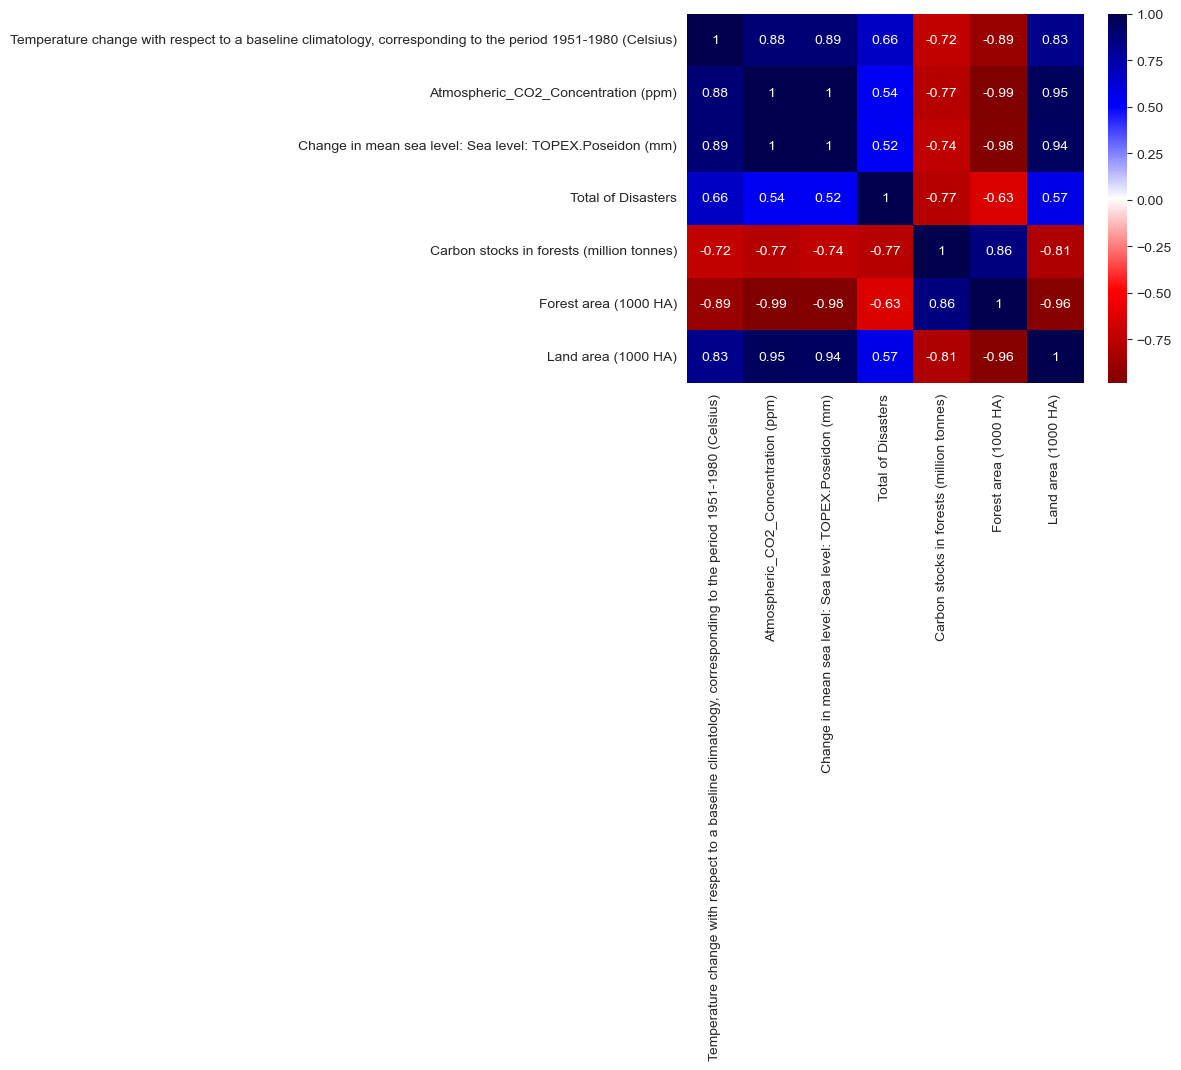

In [182]:
import seaborn as sns
corrMatrix = annual_data.iloc[:,-7:].corr(method='pearson',numeric_only=True)
sns.heatmap(corrMatrix,annot=True,cmap='seismic_r')
plt.show()

 Looking this correlation matrix I'll use only some variables that make sense to use to predict the temperature

In [201]:
annual_data_restricted = annual_data[['Year','Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)','Atmospheric_CO2_Concentration (ppm)','Change in mean sea level: Sea level: TOPEX.Poseidon (mm)','Total of Disasters','Forest area (1000 HA)','Land area (1000 HA)']]
annual_data_restricted

,Year,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)",Atmospheric_CO2_Concentration (ppm),Change in mean sea level: Sea level: TOPEX.Poseidon (mm),Total of Disasters,Forest area (1000 HA),Land area (1000 HA)
34,1992,0.184,356.545833,-16.800000,167.0,4.220757e+06,1.299094e+07
35,1993,0.348,357.215833,-16.729412,228.0,4.212918e+06,1.299057e+07
36,1994,0.507,358.959167,-13.126471,212.0,4.205080e+06,1.298936e+07
37,1995,0.835,360.968333,-9.618750,211.0,4.197241e+06,1.298906e+07
38,1996,0.355,362.743333,-6.256061,205.0,4.189403e+06,1.298901e+07
39,1997,0.656,363.876667,-4.489394,232.0,4.181565e+06,1.299595e+07
40,1998,0.993,366.840000,-4.950000,252.0,4.173726e+06,1.299334e+07
41,1999,0.783,368.540000,-3.274242,298.0,4.165888e+06,1.299402e+07
42,2000,0.728,369.707500,-1.023529,370.0,4.158050e+06,1.299993e+07
43,2001,0.834,371.319167,3.988889,343.0,4.152876e+06,1.299981e+07


#### Spliting data in dependent (Y) and independents variables (X)

In [193]:
Y = annual_data_restricted['Change in mean sea level: Sea level: TOPEX.Poseidon (mm)']
X = annual_data_restricted[['Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980 (Celsius)',
                            'Atmospheric_CO2_Concentration (ppm)',
                            'Forest area (1000 HA)']]

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=26,shuffle=False)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21, 3)
(8, 3)
(21,)
(8,)


In [196]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [197]:
y_previsto = model.predict(X_test)

In [198]:
from sklearn import metrics
print(f'Linear Regression Model R² Coefficient = {metrics.r2_score(Y_test,y_previsto,multioutput="uniform_average"):.2f}')
#print(f'Accuracy: {})

Linear Regression Model R² Coefficient = 0.55


In [199]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100,max_depth=50,random_state=26,n_jobs=-1)
model2.fit(X_train,Y_train)
y_previsto2 = model2.predict(X_test)
print(f'Random Forest Model R² Coefficient = {metrics.r2_score(Y_test,y_previsto2,multioutput="uniform_average"):.2f}')

Random Forest Model R² Coefficient = -4.53


In [200]:
def avg_esem(y1,y2):
    avg = np.zeros(len(y1),dtype='float')
    for i in range(0,len(y1)):
        avg[i] = (y1[i]+y2[i])/2
    return avg

avge = avg_esem(y_previsto,y_previsto2)
print(f'Esemble R² Coefficient = {metrics.r2_score(Y_test,avge,multioutput="uniform_average"):.2f}')

Esemble R² Coefficient = -1.26


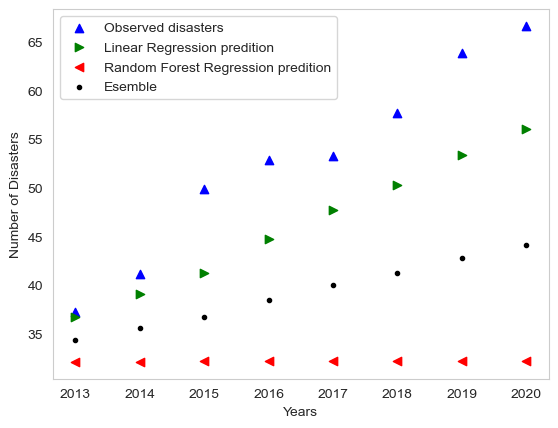

In [192]:
plt.grid(visible=False)
plt.scatter(annual_data_restricted.Year.iloc[-8:].values,Y_test.values,c='b',marker='^',label='Observed disasters')
plt.scatter(annual_data_restricted.Year.iloc[-8:].values,y_previsto,c='g',marker='>',label='Linear Regression predition')
plt.scatter(annual_data_restricted.Year.iloc[-8:].values,y_previsto2,c='r',marker='<',label='Random Forest Regression predition')
plt.scatter(annual_data_restricted.Year.iloc[-8:].values,avge,c='k',marker='.',label='Esemble')
plt.xlabel('Years')
plt.ylabel('Number of Disasters')
plt.legend()
plt.show()